In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Fashion MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train, X_val = X_train[:50000] / 255, X_train[50000:] / 255
y_train, y_val = y_train[:50000], y_train[50000:]
X_test = X_test / 255

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

Pullover


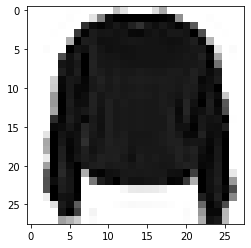

In [5]:
plt.imshow(X_train[7], cmap='binary')
print(class_names[y_train[7]])

In [6]:
cat_model = keras.models.Sequential()
cat_model.add(keras.layers.Flatten(input_shape=[28, 28]))
cat_model.add(keras.layers.Dense(300, activation='relu'))
cat_model.add(keras.layers.Dense(100, activation='relu'))
cat_model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
cat_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
cat_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [ ]:
epochs = 70
history = cat_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

In [10]:
history.params

{'verbose': 1, 'epochs': 70, 'steps': 1563}

In [11]:
def plot_cat_history(history, epochs):
    rng = range(epochs)
    plt.figure(figsize=(9, 7))
    plt.plot(rng, history['loss'], label="loss")
    plt.plot(rng, history['sparse_categorical_accuracy'], label="accuracy")
    plt.plot(rng, history['val_loss'], label='val_loss')
    plt.plot(rng, history['val_sparse_categorical_accuracy'], label='val_accuracy')
    plt.legend()

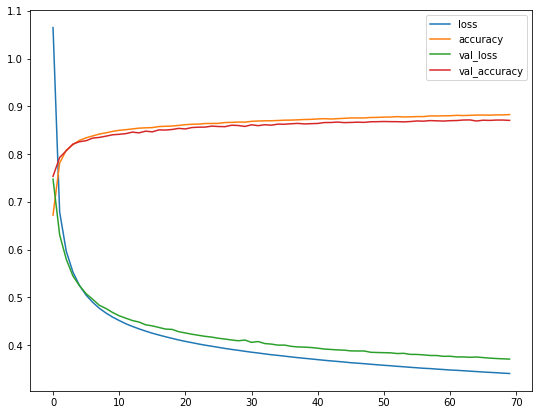

In [12]:
plot_cat_history(history.history, epochs)

In [13]:
cat_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8600


[0.3930022120475769, 0.8600000143051147]

In [14]:
test_indices = np.random.randint(0, 10000, 7)
test_pred = cat_model.predict(X_test[test_indices])
print(y_test[test_indices])
print()
print(np.argmax(test_pred, axis=1))

1/1 [==============================] - 0s 92ms/step
[9 7 1 7 2 1 2]

[9 7 1 7 2 1 2]


# California housing

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [16]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target,
                                                              test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  test_size=0.1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [19]:
reg_model = keras.models.Sequential()
reg_model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1], )))
reg_model.add(keras.layers.Dense(30, activation='relu'))
reg_model.add(keras.layers.Dense(1))
reg_model.build()

In [20]:
reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [21]:
reg_model.compile(optimizer=keras.optimizers.Adagrad(),
                  loss=keras.losses.mean_squared_error,
                  metrics=keras.metrics.mse)

In [ ]:
epochs = 70
reg_history = reg_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

In [23]:
def plot_reg_history(history, epochs):
    rng = range(epochs)
    plt.figure(figsize=(9, 7))
    plt.plot(rng, history['loss'], label="loss")
    plt.plot(rng, history['mean_squared_error'], label="mse")
    plt.plot(rng, history['val_loss'], label='val_loss')
    plt.plot(rng, history['val_mean_squared_error'], label='val_mse')
    plt.legend()

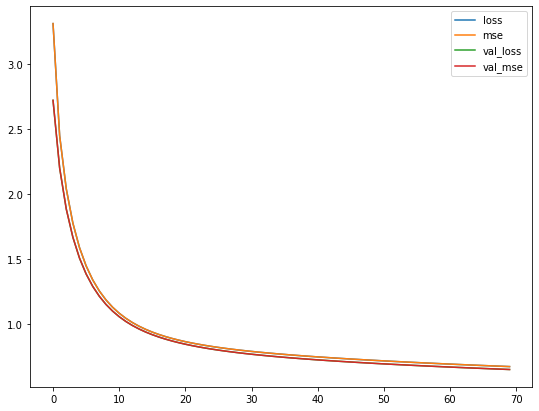

In [24]:
plot_reg_history(reg_history.history, epochs)

In [25]:
reg_model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.7052 - mean_squared_error: 0.7052


[0.7052319049835205, 0.7052319049835205]

# Wide & Deep
Технология позволяющая связать выходы глубоко обученной модели(изучившие глубокие паттерны модели) с простыми паттернами(короткий путь от входа к выходу напрямую)

In [26]:
inpt = keras.layers.Input(shape=(X_train.shape[1], ))
hid_1 = keras.layers.Dense(30, activation='relu')(inpt)
hid_2 = keras.layers.Dense(30, activation='relu')(hid_1)
concat = keras.layers.Concatenate()([inpt, hid_2])
out = keras.layers.Dense(1)(concat)
wide_deep_mod = keras.Model(inputs=[inpt], outputs=[out])

In [27]:
wide_deep_mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_6[0][0]']            

In [28]:
wide_deep_mod.compile(optimizer=keras.optimizers.Adagrad(),
                  loss=keras.losses.mean_squared_error,
                  metrics=keras.metrics.mse)

In [ ]:
epochs = 70
wide_deep_history = wide_deep_mod.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

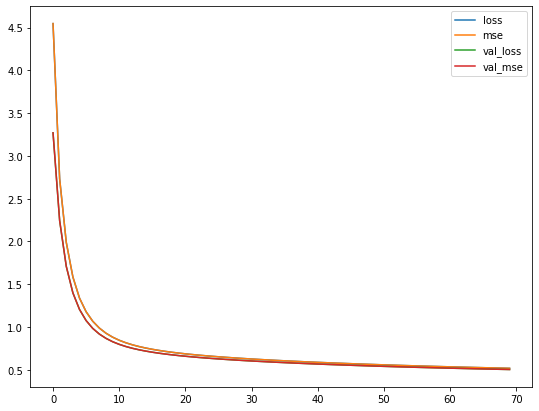

In [30]:
plot_reg_history(wide_deep_history.history, epochs)

In [31]:
wide_deep_mod.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.5662 - mean_squared_error: 0.5662


[0.566180944442749, 0.566180944442749]

# Wide&Deep
Несколько входов

In [32]:
inpt_a = keras.layers.Input(shape=(5, ), name='wide')
inpt_b = keras.layers.Input(shape=(6, ), name='deep')
hid_1 = keras.layers.Dense(30, activation='relu')(inpt_b)
hid_2 = keras.layers.Dense(30, activation='relu')(hid_1)
concat = keras.layers.Concatenate(name='concat')([inpt_a, hid_2])
out = keras.layers.Dense(1, name='output')(concat)
wide_deep_mod = keras.Model(inputs=[inpt_a, inpt_b], outputs=[out])

In [33]:
wide_deep_mod.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep (InputLayer)              [(None, 6)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           210         ['deep[0][0]']                   
                                                                                                  
 wide (InputLayer)              [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                            

In [34]:
wide_deep_mod.compile(optimizer=keras.optimizers.Adagrad(),
                  loss=keras.losses.mean_squared_error,
                  metrics=keras.metrics.mse)

In [ ]:
epochs = 70
wide_deep_hist = wide_deep_mod.fit((X_train[:, :5], X_train[:,2:]), y_train,
                                   epochs=epochs,
                                   validation_data=((X_val[:, :5], X_val[:, 2:]), y_val))

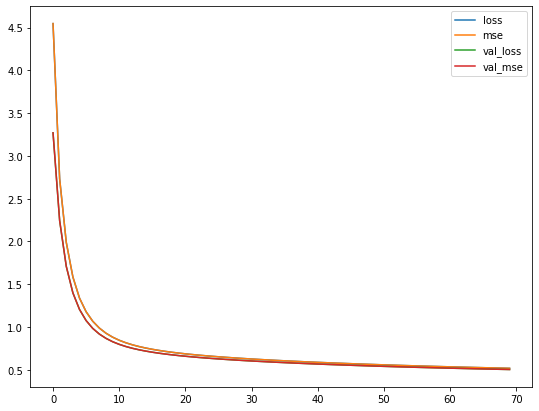

In [36]:
plot_reg_history(wide_deep_history.history, epochs)

# Wide&Deep
несколько входов, несколько выходов

In [37]:
inpt_1 = keras.layers.Input(shape=(5, ))
inpt_2 = keras.layers.Input(shape=(6, ))
hidn_1 = keras.layers.Dense(30, activation='relu')(inpt_2)
hidn_2 = keras.layers.Dense(30, activation='relu')(hidn_1)
concat = keras.layers.Concatenate()([inpt_1, hidn_2])
out_1 = keras.layers.Dense(1, name='main')(concat)
out_2 = keras.layers.Dense(1, name='sub')(hidn_2)
wide_deep_mul_model = keras.Model(inputs=[inpt_1, inpt_2], outputs=[out_1, out_2])

In [38]:
wide_deep_mul_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

In [39]:
wide_deep_mul_model.compile(
    optimizer=keras.optimizers.Adagrad(),
    loss=[keras.losses.mean_squared_error, keras.losses.mean_squared_error],
    metrics=[keras.metrics.mse],
    loss_weights=[0.7, 0.3]
)

In [ ]:
wide_deep_mul_history = wide_deep_mul_model.fit(x = [X_train[:, :5], X_train[:, 2:]],
                                                y = [y_train, y_train],
                                                epochs=epochs,
                                                validation_data=((X_val[:, :5], X_val[:, 2:]), ([y_val, y_val])))

# Callback, EarlyStopping

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])
#checkpoint_cb = keras.callbacks.ModelCheckpoint('tmp.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(optimizer=keras.optimizers.Adagrad(),
              loss=keras.losses.mean_squared_error,
              metrics=keras.metrics.mean_squared_error)
mod_history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

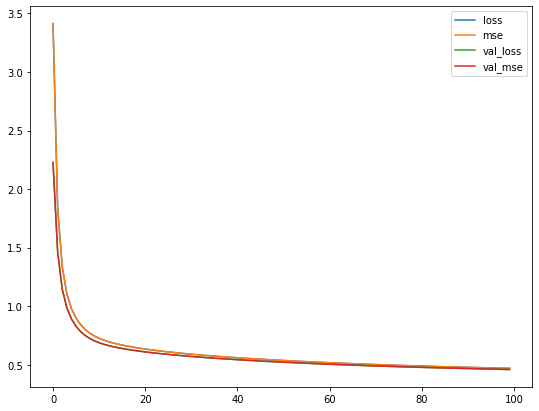

In [47]:
plot_reg_history(mod_history.history, 100)